# 3. Awkward Array

<br><br><br><br><br>

## What about an array of lists?

In [1]:
import awkward as ak
import numpy as np
import uproot

In [2]:
events = uproot.open("data/HZZ.root:events")
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
NJet                 | int32_t                  | AsDtype('>i4')
Jet_Px               | float[]                  | AsJagged(AsDtype('>f4'))
Jet_Py               | float[]                  | AsJagged(AsDtype('>f4'))
Jet_Pz               | float[]                  | AsJagged(AsDtype('>f4'))
Jet_E                | float[]                  | AsJagged(AsDtype('>f4'))
Jet_btag             | float[]                  | AsJagged(AsDtype('>f4'))
Jet_ID               | bool[]                   | AsJagged(AsDtype('bool'))
NMuon                | int32_t                  | AsDtype('>i4')
Muon_Px              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_Py              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_Pz              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_E               | float[]  

In [3]:
events["Muon_Px"].array()

<Array [[-52.9, 37.7], ... 1.14], [23.9]] type='2421 * var * float32'>

In [5]:
events["Muon_Px"].array(entry_stop=20).tolist()

[[-52.89945602416992, 37.7377815246582],
 [-0.8164593577384949],
 [48.987831115722656, 0.8275666832923889],
 [22.08833122253418, 76.6919174194336],
 [45.171321868896484, 39.75095748901367],
 [9.228110313415527, -5.793715000152588],
 [12.538717269897461, 29.541839599609375],
 [34.883758544921875],
 [-53.16697311401367, 11.491869926452637],
 [-67.01485443115234, -18.118755340576172],
 [15.983028411865234, 34.68440628051758],
 [-70.51190948486328, -38.028743743896484],
 [58.94381332397461],
 [-15.587870597839355],
 [-122.33011627197266, -1.0597527027130127],
 [-46.70415496826172, 39.020023345947266],
 [51.29465866088867, 17.45092010498047],
 [43.28120040893555],
 [-45.92393493652344, 22.549766540527344],
 [43.29360580444336, -33.28158187866211, -4.376191139221191]]

This is what Awkward Array was made for. NumPy's equivalent is cumbersome and inefficient.

In [6]:
jagged_numpy = events["Muon_Px"].array(entry_stop=20, library="np")
jagged_numpy

array([array([-52.899456,  37.73778 ], dtype=float32),
       array([-0.81645936], dtype=float32),
       array([48.98783  ,  0.8275667], dtype=float32),
       array([22.088331, 76.69192 ], dtype=float32),
       array([45.17132 , 39.750957], dtype=float32),
       array([ 9.22811 , -5.793715], dtype=float32),
       array([12.538717, 29.54184 ], dtype=float32),
       array([34.88376], dtype=float32),
       array([-53.166973,  11.49187 ], dtype=float32),
       array([-67.014854, -18.118755], dtype=float32),
       array([15.983028, 34.684406], dtype=float32),
       array([-70.51191 , -38.028744], dtype=float32),
       array([58.943813], dtype=float32),
       array([-15.587871], dtype=float32),
       array([-122.33012  ,   -1.0597527], dtype=float32),
       array([-46.704155,  39.020023], dtype=float32),
       array([51.29466, 17.45092], dtype=float32),
       array([43.2812], dtype=float32),
       array([-45.923935,  22.549767], dtype=float32),
       array([ 43.293606, -33.

What if I want the first item in each list as an array?

In [7]:
np.array([x[0] for x in jagged_numpy])

array([ -52.899456  ,   -0.81645936,   48.98783   ,   22.088331  ,
         45.17132   ,    9.22811   ,   12.538717  ,   34.88376   ,
        -53.166973  ,  -67.014854  ,   15.983028  ,  -70.51191   ,
         58.943813  ,  -15.587871  , -122.33012   ,  -46.704155  ,
         51.29466   ,   43.2812    ,  -45.923935  ,   43.293606  ],
      dtype=float32)

This violates the rule from [1-python-performance.ipynb](1-python-performance.ipynb): don't iterate in Python.

In [10]:
jagged_numpy[:, 0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [8]:
jagged_awkward = events["Muon_Px"].array(entry_stop=20, library="ak")
jagged_awkward

<Array [[-52.9, 37.7], ... 43.3, -33.3, -4.38]] type='20 * var * float32'>

In [9]:
jagged_awkward[:, 0]

<Array [-52.9, -0.816, 49, ... -45.9, 43.3] type='20 * float32'>

In [18]:
jagged_awkward[:5, :1]

<Array [[-52.9], [-0.816], ... [22.1], [45.2]] type='5 * var * float32'>

<br><br><br><br><br>

### Jaggedness in Pandas

It can be done by putting the distinction between events in the DataFrame index.

In [19]:
events.arrays(filter_name="Muon_*", library="pd")

Muon_Px    Muon_Py     Muon_Pz      Muon_E  Muon_Charge  \
entry subentry                                                              
0     0        -52.899456 -11.654672   -8.160793   54.779499            1   
      1         37.737782   0.693474  -11.307582   39.401695           -1   
1     0         -0.816459 -24.404259   20.199968   31.690445            1   
2     0         48.987831 -21.723139   11.168285   54.739788            1   
      1          0.827567  29.800508   36.965191   47.488857           -1   
...                   ...        ...         ...         ...          ...   
2416  0        -39.285824 -14.607491   61.715790   74.602982           -1   
2417  0         35.067146 -14.150043  160.817917  165.203949           -1   
2418  0        -29.756786 -15.303859  -52.663750   62.395161           -1   
2419  0          1.141870  63.609570  162.176315  174.208633           -1   
2420  0         23.913206 -35.665077   54.719437   69.556213           -1   

                Muon_Iso  
entry subentry            
0     0         4.200153  
      1         2.151061  
1     0         2.188047  
2     0         1.412822  
      1         3.383504  
...                  ...  
2416  0         1.080880  
2417  0         3.427752  
2418  0         3.762945  
2419  0         0.550811  
2420  0         0.000000  

[3825 rows x 6 columns]

But if you want multiple particles, they can't be in the same DataFrame.

(A DataFrame has only one index; how would you relate jet subentry #1 with muon subentry #1?)

In [20]:
dataframes = events.arrays(filter_name="/(Muon_|Jet_).*/", library="pd")

In [21]:
len(dataframes)

2

In [22]:
dataframes[0]

Jet_Px     Jet_Py      Jet_Pz       Jet_E  Jet_btag  Jet_ID
entry subentry                                                                
1     0        -38.874714  19.863453   -0.894942   44.137363      -1.0    True
3     0        -71.695213  93.571579  196.296432  230.346008      -1.0    True
      1         36.606369  21.838793   91.666283  101.358841      -1.0    True
      2        -28.866419   9.320708   51.243221   60.084141      -1.0    True
4     0          3.880162 -75.234055 -359.601624  367.585480      -1.0    True
...                   ...        ...         ...         ...       ...     ...
2417  0        -33.196457 -59.664749  -29.040150   74.944725      -1.0    True
      1        -26.086025 -19.068407   26.774284   42.481457      -1.0    True
2418  0         -3.714818 -37.202377   41.012222   55.950581      -1.0    True
2419  0        -36.361286  10.173571  226.429214  229.577988      -1.0    True
      1        -15.256871 -27.175364   12.119683   33.920349      -1.0    True

[2773 rows x 6 columns]

In [23]:
dataframes[1]

Muon_Px    Muon_Py     Muon_Pz      Muon_E  Muon_Charge  \
entry subentry                                                              
0     0        -52.899456 -11.654672   -8.160793   54.779499            1   
      1         37.737782   0.693474  -11.307582   39.401695           -1   
1     0         -0.816459 -24.404259   20.199968   31.690445            1   
2     0         48.987831 -21.723139   11.168285   54.739788            1   
      1          0.827567  29.800508   36.965191   47.488857           -1   
...                   ...        ...         ...         ...          ...   
2416  0        -39.285824 -14.607491   61.715790   74.602982           -1   
2417  0         35.067146 -14.150043  160.817917  165.203949           -1   
2418  0        -29.756786 -15.303859  -52.663750   62.395161           -1   
2419  0          1.141870  63.609570  162.176315  174.208633           -1   
2420  0         23.913206 -35.665077   54.719437   69.556213           -1   

                Muon_Iso  
entry subentry            
0     0         4.200153  
      1         2.151061  
1     0         2.188047  
2     0         1.412822  
      1         3.383504  
...                  ...  
2416  0         1.080880  
2417  0         3.427752  
2418  0         3.762945  
2419  0         0.550811  
2420  0         0.000000  

[3825 rows x 6 columns]

Again, that's why we have Awkward Array.

In [24]:
array = events.arrays(filter_name="/(Muon_|Jet_).*/", library="ak", how="zip")
array

<Array [{Jet: [], Muon: [, ... Iso: 0}]}] type='2421 * {"Jet": var * {"Px": floa...'>

In [34]:
ak.firsts(array.Jet)

<Array [None, {Px: -38.9, ... ID: True}, None] type='2421 * ?{"Px": float32, "Py...'>

In [26]:
array.Jet.Px

<Array [[], [-38.9], ... [-36.4, -15.3], []] type='2421 * var * float32'>

In [27]:
array.Muon

<Array [[{Px: -52.9, Py: -11.7, ... Iso: 0}]] type='2421 * var * {"Px": float32,...'>

In [28]:
array.Muon.Px

<Array [[-52.9, 37.7], ... 1.14], [23.9]] type='2421 * var * float32'>

In [29]:
ak.num(array.Jet), ak.num(array.Muon)

(<Array [0, 1, 0, 3, 2, 2, ... 0, 1, 2, 1, 2, 0] type='2421 * int64'>,
 <Array [2, 1, 2, 2, 2, 2, ... 2, 1, 1, 1, 1, 1] type='2421 * int64'>)

<br><br><br><br><br>

## Awkward Array is a general-purpose library: NumPy-like idioms on JSON-like data

<img src="img/pivarski-one-slide-summary.svg" style="width: 70%">

<br><br><br><br><br>

## Main idea: slicing through structure is computationally inexpensive

Slicing by field name doesn't modify any large buffers and [ak.zip](https://awkward-array.readthedocs.io/en/latest/_auto/ak.zip.html) only scans them to ensure they're compatible (not even that if `depth_limit=1`).

In [35]:
array = events.arrays()
array

<Array [{NJet: 0, ... EventWeight: 0.00876}] type='2421 * {"NJet": int32, "Jet_P...'>

Think of this as zero-cost:

In [36]:
array.Muon_Px, array.Muon_Py, array.Muon_Pz

(<Array [[-52.9, 37.7], ... 1.14], [23.9]] type='2421 * var * float32'>,
 <Array [[-11.7, 0.693], ... 63.6], [-35.7]] type='2421 * var * float32'>,
 <Array [[-8.16, -11.3], ... 162], [54.7]] type='2421 * var * float32'>)

Think of this as zero-cost:

In [37]:
ak.zip({"px": array.Muon_Px, "py": array.Muon_Py, "pz": array.Muon_Pz})

<Array [[{px: -52.9, py: -11.7, ... pz: 54.7}]] type='2421 * var * {"px": float3...'>

(The above is a manual version of `how="zip"`.)

<br><br><br>

NumPy ufuncs work on these arrays (if they're "[broadcastable](https://awkward-array.readthedocs.io/en/latest/_auto/ak.broadcast_arrays.html)").

In [38]:
np.sqrt(array.Muon_Px**2 + array.Muon_Py**2)

<Array [[54.2, 37.7], [24.4, ... 63.6], [42.9]] type='2421 * var * float32'>

In [43]:
np.add

<ufunc 'add'>

In [46]:
array.Muon_Px + array.Muon_Py

<Array [[-64.6, 38.4], ... 64.8], [-11.8]] type='2421 * var * float32'>

In [48]:
import numba as nb

In [62]:
@nb.vectorize([nb.float32(nb.float32, nb.float32)])
def add(x, y):
    return x + y

In [59]:
add

<numba._DUFunc 'add'>

In [60]:
add(array.Muon_Px, array.Muon_Py)

<Array [[-64.6, 38.4], ... 64.8], [-11.8]] type='2421 * var * float32'>

In [57]:
@nb.jit
def anything_else(asdf):
    asdf

<br><br><br>

And there are specialized operations that only make sense in a variable-length context.

<table style="margin-left: 0px">
    <tr style="background: white"><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.readthedocs.io/en/latest/_auto/ak.cartesian.html">ak.cartesian</a></td><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.readthedocs.io/en/latest/_auto/ak.combinations.html">ak.combinations</a></td></tr>
    <tr style="background: white"><td><img src="img/cartoon-cartesian.png"></td><td><img src="img/cartoon-combinations.png"></td></tr>
</table>

In [63]:
ak.cartesian((array.Muon_Px, array.Jet_Px))

<Array [[], [(-0.816, -38.9, ... -15.3)], []] type='2421 * var * (float32, float32)'>

In [65]:
ak.combinations(array.Muon_Px, 3)

<Array [[], [], [], [], ... [], [], [], []] type='2421 * var * (float32, float32...'>

<br><br><br><br><br>

## Arrays can have custom [behavior](https://awkward-array.readthedocs.io/en/latest/ak.behavior.html)

The following come from the new [Vector](https://github.com/scikit-hep/vector#readme) library.

In [66]:
import vector
vector.register_awkward()

In [67]:
muons = ak.zip({"px": array.Muon_Px, "py": array.Muon_Py, "pz": array.Muon_Pz, "E": array.Muon_E}, with_name="Momentum4D")
muons

<MomentumArray4D [[{px: -52.9, py: -11.7, ... E: 69.6}]] type='2421 * var * Mome...'>

This is an array of lists of vectors, and methods like `pt`, `eta`, `phi` apply through the whole array.

In [68]:
muons.pt

<Array [[54.2, 37.7], [24.4, ... 63.6], [42.9]] type='2421 * var * float32'>

In [69]:
muons.eta

<Array [[-0.15, -0.295], ... 1.67], [1.06]] type='2421 * var * float32'>

In [70]:
muons.phi

<Array [[-2.92, 0.0184], ... 1.55], [-0.98]] type='2421 * var * float32'>

In [73]:
muons.rapidity

<Array [[-0.15, -0.295], ... 1.67], [1.06]] type='2421 * var * float32'>

In [75]:
muons[0, 0].pt

54.16810703140204

<br><br><br>

Let's try an example: ΔR(muons, jets)

In [76]:
jets = ak.zip({"px": array.Jet_Px, "py": array.Jet_Py, "pz": array.Jet_Pz, "E": array.Jet_E}, with_name="Momentum4D")
jets

<MomentumArray4D [[], [{px: -38.9, ... E: 33.9}], []] type='2421 * var * Momentu...'>

In [77]:
ak.num(muons), ak.num(jets)

(<Array [2, 1, 2, 2, 2, 2, ... 2, 1, 1, 1, 1, 1] type='2421 * int64'>,
 <Array [0, 1, 0, 3, 2, 2, ... 0, 1, 2, 1, 2, 0] type='2421 * int64'>)

In [79]:
ak.cartesian((muons, jets)).type

2421 * var * (Momentum4D["px": float32, "py": float32, "pz": float32, "E": float32], Momentum4D["px": float32, "py": float32, "pz": float32, "E": float32])

In [80]:
ms, js = ak.unzip(ak.cartesian((muons, jets)))
ms, js

(<MomentumArray4D [[], [{px: -0.816, ... E: 174}], []] type='2421 * var * Momentu...'>,
 <MomentumArray4D [[], [{px: -38.9, ... E: 33.9}], []] type='2421 * var * Momentu...'>)

In [81]:
ak.num(ms), ak.num(js)

(<Array [0, 1, 0, 6, 4, 4, ... 0, 1, 2, 1, 2, 0] type='2421 * int64'>,
 <Array [0, 1, 0, 6, 4, 4, ... 0, 1, 2, 1, 2, 0] type='2421 * int64'>)

In [82]:
ms.deltaR(js)

<Array [[], [2.15], [], ... [1.55, 2.94], []] type='2421 * var * float32'>

<br><br><br>

And another: muon pairs (all combinations, not just the first two per event).

In [99]:
ak.num(muons)

<Array [2, 1, 2, 2, 2, 2, ... 2, 1, 1, 1, 1, 1] type='2421 * int64'>

In [85]:
m1, m2 = ak.unzip(ak.combinations(muons, 2))
m1, m2

(<MomentumArray4D [[{px: -52.9, py: -11.7, ... [], []] type='2421 * var * Momentu...'>,
 <MomentumArray4D [[{px: 37.7, py: 0.693, ... [], []] type='2421 * var * Momentum...'>)

In [86]:
ak.num(m1), ak.num(m2)

(<Array [1, 0, 1, 1, 1, 1, ... 1, 0, 0, 0, 0, 0] type='2421 * int64'>,
 <Array [1, 0, 1, 1, 1, 1, ... 1, 0, 0, 0, 0, 0] type='2421 * int64'>)

In [87]:
m1 + m2

<MomentumArray4D [[{x: -15.2, y: -11, ... [], []] type='2421 * var * Momentum4D[...'>

In [88]:
(m1 + m2).mass

<Array [[90.2], [], [74.7], ... [], [], [], []] type='2421 * var * float32'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff01fb27d90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

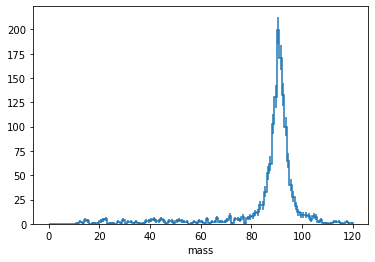

In [89]:
import hist

hist.Hist.new.Reg(120, 0, 120, name="mass").Double().fill(
    ak.flatten((m1 + m2).mass)
).plot()

<br><br><br>

### It doesn't matter which coordinates were used to construct it

In [90]:
array2 = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root:Events"
).arrays(["Muon_pt", "Muon_eta", "Muon_phi", "Muon_charge"], entry_stop=100000)

In [92]:
array2.type

100000 * {"Muon_pt": var * float32, "Muon_eta": var * float32, "Muon_phi": var * float32, "Muon_charge": var * int32}

In [93]:
import particle

muons2 = ak.zip({"pt": array2.Muon_pt, "eta": array2.Muon_eta, "phi": array2.Muon_phi, "q": array2.Muon_charge}, with_name="Momentum4D")
muons2["mass"] = particle.Particle.from_string("mu").mass / 1000.0
muons2

<MomentumArray4D [[{pt: 10.8, ... mass: 0.106}]] type='100000 * var * Momentum4D...'>

In [94]:
muons2.type

100000 * var * Momentum4D["pt": float32, "eta": float32, "phi": float32, "q": int32, "mass": float64]

As long as you use properties (dots, not strings in brackets), you don't need to care what coordinates it's based on.

In [95]:
muons2.px

<Array [[10.8, -13], ... [10.2, -2.02, 4.2]] type='100000 * var * float32'>

In [96]:
muons2.py

<Array [[-0.369, 8.87], ... -5.28, 2.33, 2.65]] type='100000 * var * float32'>

In [97]:
muons2.pz

<Array [[13.8, -9.35], ... 5.25, -8.11, 4.18]] type='100000 * var * float32'>

In [98]:
muons2.E

<Array [[17.5, 18.3], ... 12.6, 8.67, 6.49]] type='100000 * var * float64'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fefeffcc220>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

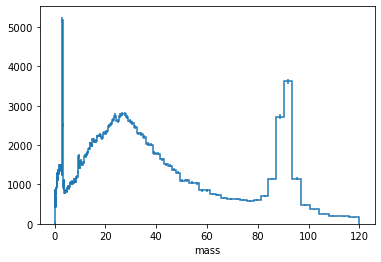

In [100]:
m1, m2 = ak.unzip(ak.combinations(muons2, 2))
hist.Hist.new.Log(200, 0.1, 120, name="mass").Double().fill(
    ak.flatten((m1 + m2).mass)
).plot()

<br><br><br>

## Awkward Arrays and Vector in Numba

Remember Numba, the JIT-compiler from [1-python-performance.ipynb](1-python-performance.ipynb)? Awkward Array and Vector have been implemented in Numba's compiler.

In [101]:
import numba as nb

@nb.njit
def first_big_dimuon(events):
    for event in events:
        for i in range(len(event)):
            mu1 = event[i]
            for j in range(i + 1, len(event)):
                mu2 = event[j]
                dimuon = mu1 + mu2
                if dimuon.mass > 10:
                    return dimuon

In [102]:
first_big_dimuon(muons2)

vector.obj(pt=8.79338264465332, phi=1.8283271789550781, eta=0.48550859093666077, mass=34.41546777888355)

In [105]:
array

<Array [{NJet: 0, ... EventWeight: 0.00876}] type='2421 * {"NJet": int32, "Jet_P...'>

In [106]:
array.type

2421 * {"NJet": int32, "Jet_Px": var * float32, "Jet_Py": var * float32, "Jet_Pz": var * float32, "Jet_E": var * float32, "Jet_btag": var * float32, "Jet_ID": var * bool, "NMuon": int32, "Muon_Px": var * float32, "Muon_Py": var * float32, "Muon_Pz": var * float32, "Muon_E": var * float32, "Muon_Charge": var * int32, "Muon_Iso": var * float32, "NElectron": int32, "Electron_Px": var * float32, "Electron_Py": var * float32, "Electron_Pz": var * float32, "Electron_E": var * float32, "Electron_Charge": var * int32, "Electron_Iso": var * float32, "NPhoton": int32, "Photon_Px": var * float32, "Photon_Py": var * float32, "Photon_Pz": var * float32, "Photon_E": var * float32, "Photon_Iso": var * float32, "MET_px": float32, "MET_py": float32, "MChadronicBottom_px": float32, "MChadronicBottom_py": float32, "MChadronicBottom_pz": float32, "MCleptonicBottom_px": float32, "MCleptonicBottom_py": float32, "MCleptonicBottom_pz": float32, "MChadronicWDecayQuark_px": float32, "MChadronicWDecayQuark_py": 

In [107]:
muons

<MomentumArray4D [[{px: -52.9, py: -11.7, ... E: 69.6}]] type='2421 * var * Mome...'>

In [108]:
muons.type

2421 * var * Momentum4D["px": float32, "py": float32, "pz": float32, "E": float32]

In [109]:
ak.to_pandas(muons)

px         py          pz           E
entry subentry                                              
0     0        -52.899456 -11.654672   -8.160793   54.779499
      1         37.737782   0.693474  -11.307582   39.401695
1     0         -0.816459 -24.404259   20.199968   31.690445
2     0         48.987831 -21.723139   11.168285   54.739788
      1          0.827567  29.800508   36.965191   47.488857
...                   ...        ...         ...         ...
2416  0        -39.285824 -14.607491   61.715790   74.602982
2417  0         35.067146 -14.150043  160.817917  165.203949
2418  0        -29.756786 -15.303859  -52.663750   62.395161
2419  0          1.141870  63.609570  162.176315  174.208633
2420  0         23.913206 -35.665077   54.719437   69.556213

[3825 rows x 4 columns]